In [1]:
import json
import glob
import gzip
import pandas as pd
from os import listdir
from os.path import isfile, join
from dotenv import dotenv_values

%matplotlib inline


In [2]:
def unzip(file_path):
    with gzip.open(file_path, 'r') as file:
        json_bytes = file.read()   
    return json.loads(json_bytes.decode('utf-8')) 



zipped_files = glob.glob('./data/data/2_builder-submissions/*')
zipped_files.sort()

In [3]:
count_files_to_load = 10

def load_file(path):
    print(f"loaded from {path}")
    return pd.read_json(path)

submissions = load_file(zipped_files[0])
for idx in range(1, count_files_to_load):
    # Keep combining row-wise.
    next_df = load_file(zipped_files[idx])
    submissions = pd.concat([submissions, next_df], ignore_index=True)

print(f"loaded {len(submissions.index)} rows from {count_files_to_load} files")


loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4650001-to-4700000.json
loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4700001-to-4750000.json
loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4750001-to-4760000.json
loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4760001-to-4770000.json
loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4770001-to-4780000.json
loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4780001-to-4790000.json
loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4790001-to-4800000.json
loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4800001-to-4810000.json
loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4810001-to-4820000.json
loaded from ./data/data/2_builder-submissions/builder-submissions_slot-4820001-to-4830000.json
loaded 4294065 rows from 10 files


In [4]:
submissions.iloc[0]

slot                                                                4650010
parent_hash               0x0ff2caf38b3040a0d23a84987bbeb1f3ab781764131a...
block_hash                0x685c299bf77f9a70040ef8d563dc586759d1335be5eb...
builder_pubkey            0xa1dead01e65f0a0eee7b5170223f20c8f0cbf122eac3...
proposer_pubkey           0x00000000000000000000000000000000000000000000...
proposer_fee_recipient           0x0000000000000000000000000000000000000000
gas_limit                                                          30000000
gas_used                                                             878407
value                                                    5272625077982087.0
num_tx                                                                   12
block_number                                                       15495313
timestamp                                               2022-09-08 08:02:11
timestamp_ms                                     2022-09-08 08:02:11.739000
Name: 0, dty

,slot,count of submissions
0,4650010,10
1,4650011,10
2,4650012,18
3,4650013,4
4,4650014,10


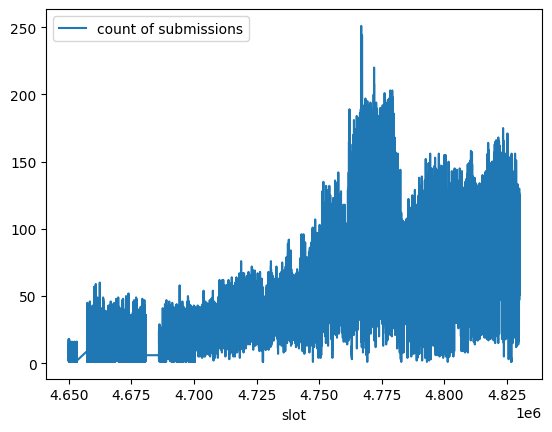

In [5]:
submissions_per_slot = submissions.groupby(['slot'], as_index=False).size().rename(columns={'size': 'count of submissions'})
submissions_per_slot.plot(x="slot", y="count of submissions")
submissions_per_slot.head()

<AxesSubplot: xlabel='slot'>

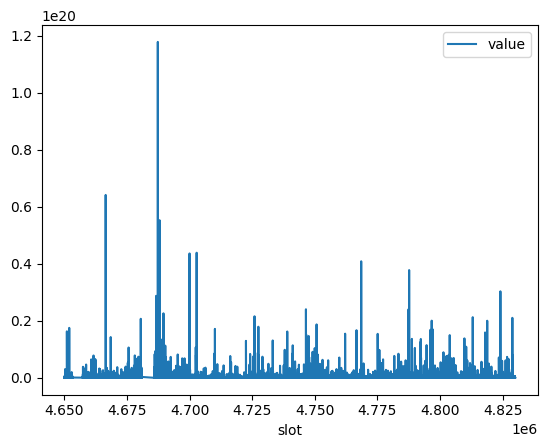

In [6]:
value_per_slot = submissions.groupby(['slot'], sort=False, as_index=False)['value'].max()
value_per_slot.plot(x="slot", y="value")

<AxesSubplot: xlabel='slot'>

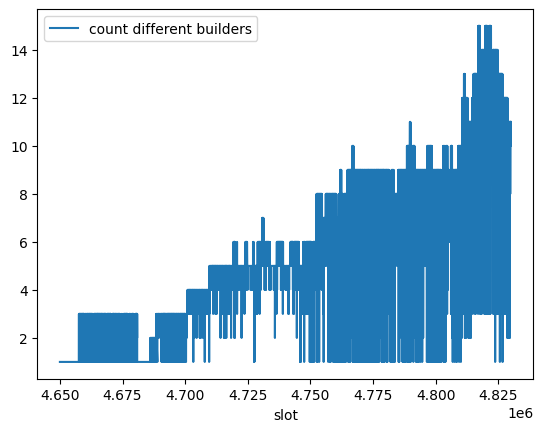

In [7]:
unique_builders_per_slot = submissions.groupby(['slot'], sort=False, as_index = False)['builder_pubkey'].nunique().rename(columns={'builder_pubkey': 'count different builders'})
unique_builders_per_slot.plot(x="slot", y="count different builders")